In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('../data/raw/BankChurners.csv')

In [6]:
# 기본 정보 확인
print(df.shape)
print("-" * 80)
print(df.info())
print("-" * 80)
print(df.head())

(10127, 23)
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  i

In [4]:
# 마지막 두 컬럼 제거
df = df.iloc[:, :-2]
print(df.describe())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

In [6]:
# 'Unknown' 텍스트를 결측치로 변환
df = df.replace('Unknown', np.nan)

# 결측치 확인
print(df.isnull().sum())

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


In [ ]:
print(df['Attrition_Flag'].value_counts())
print("-" * 80)
print(df['Attrition_Flag'].value_counts(normalize=True))

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
--------------------------------------------------------------------------------
Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64


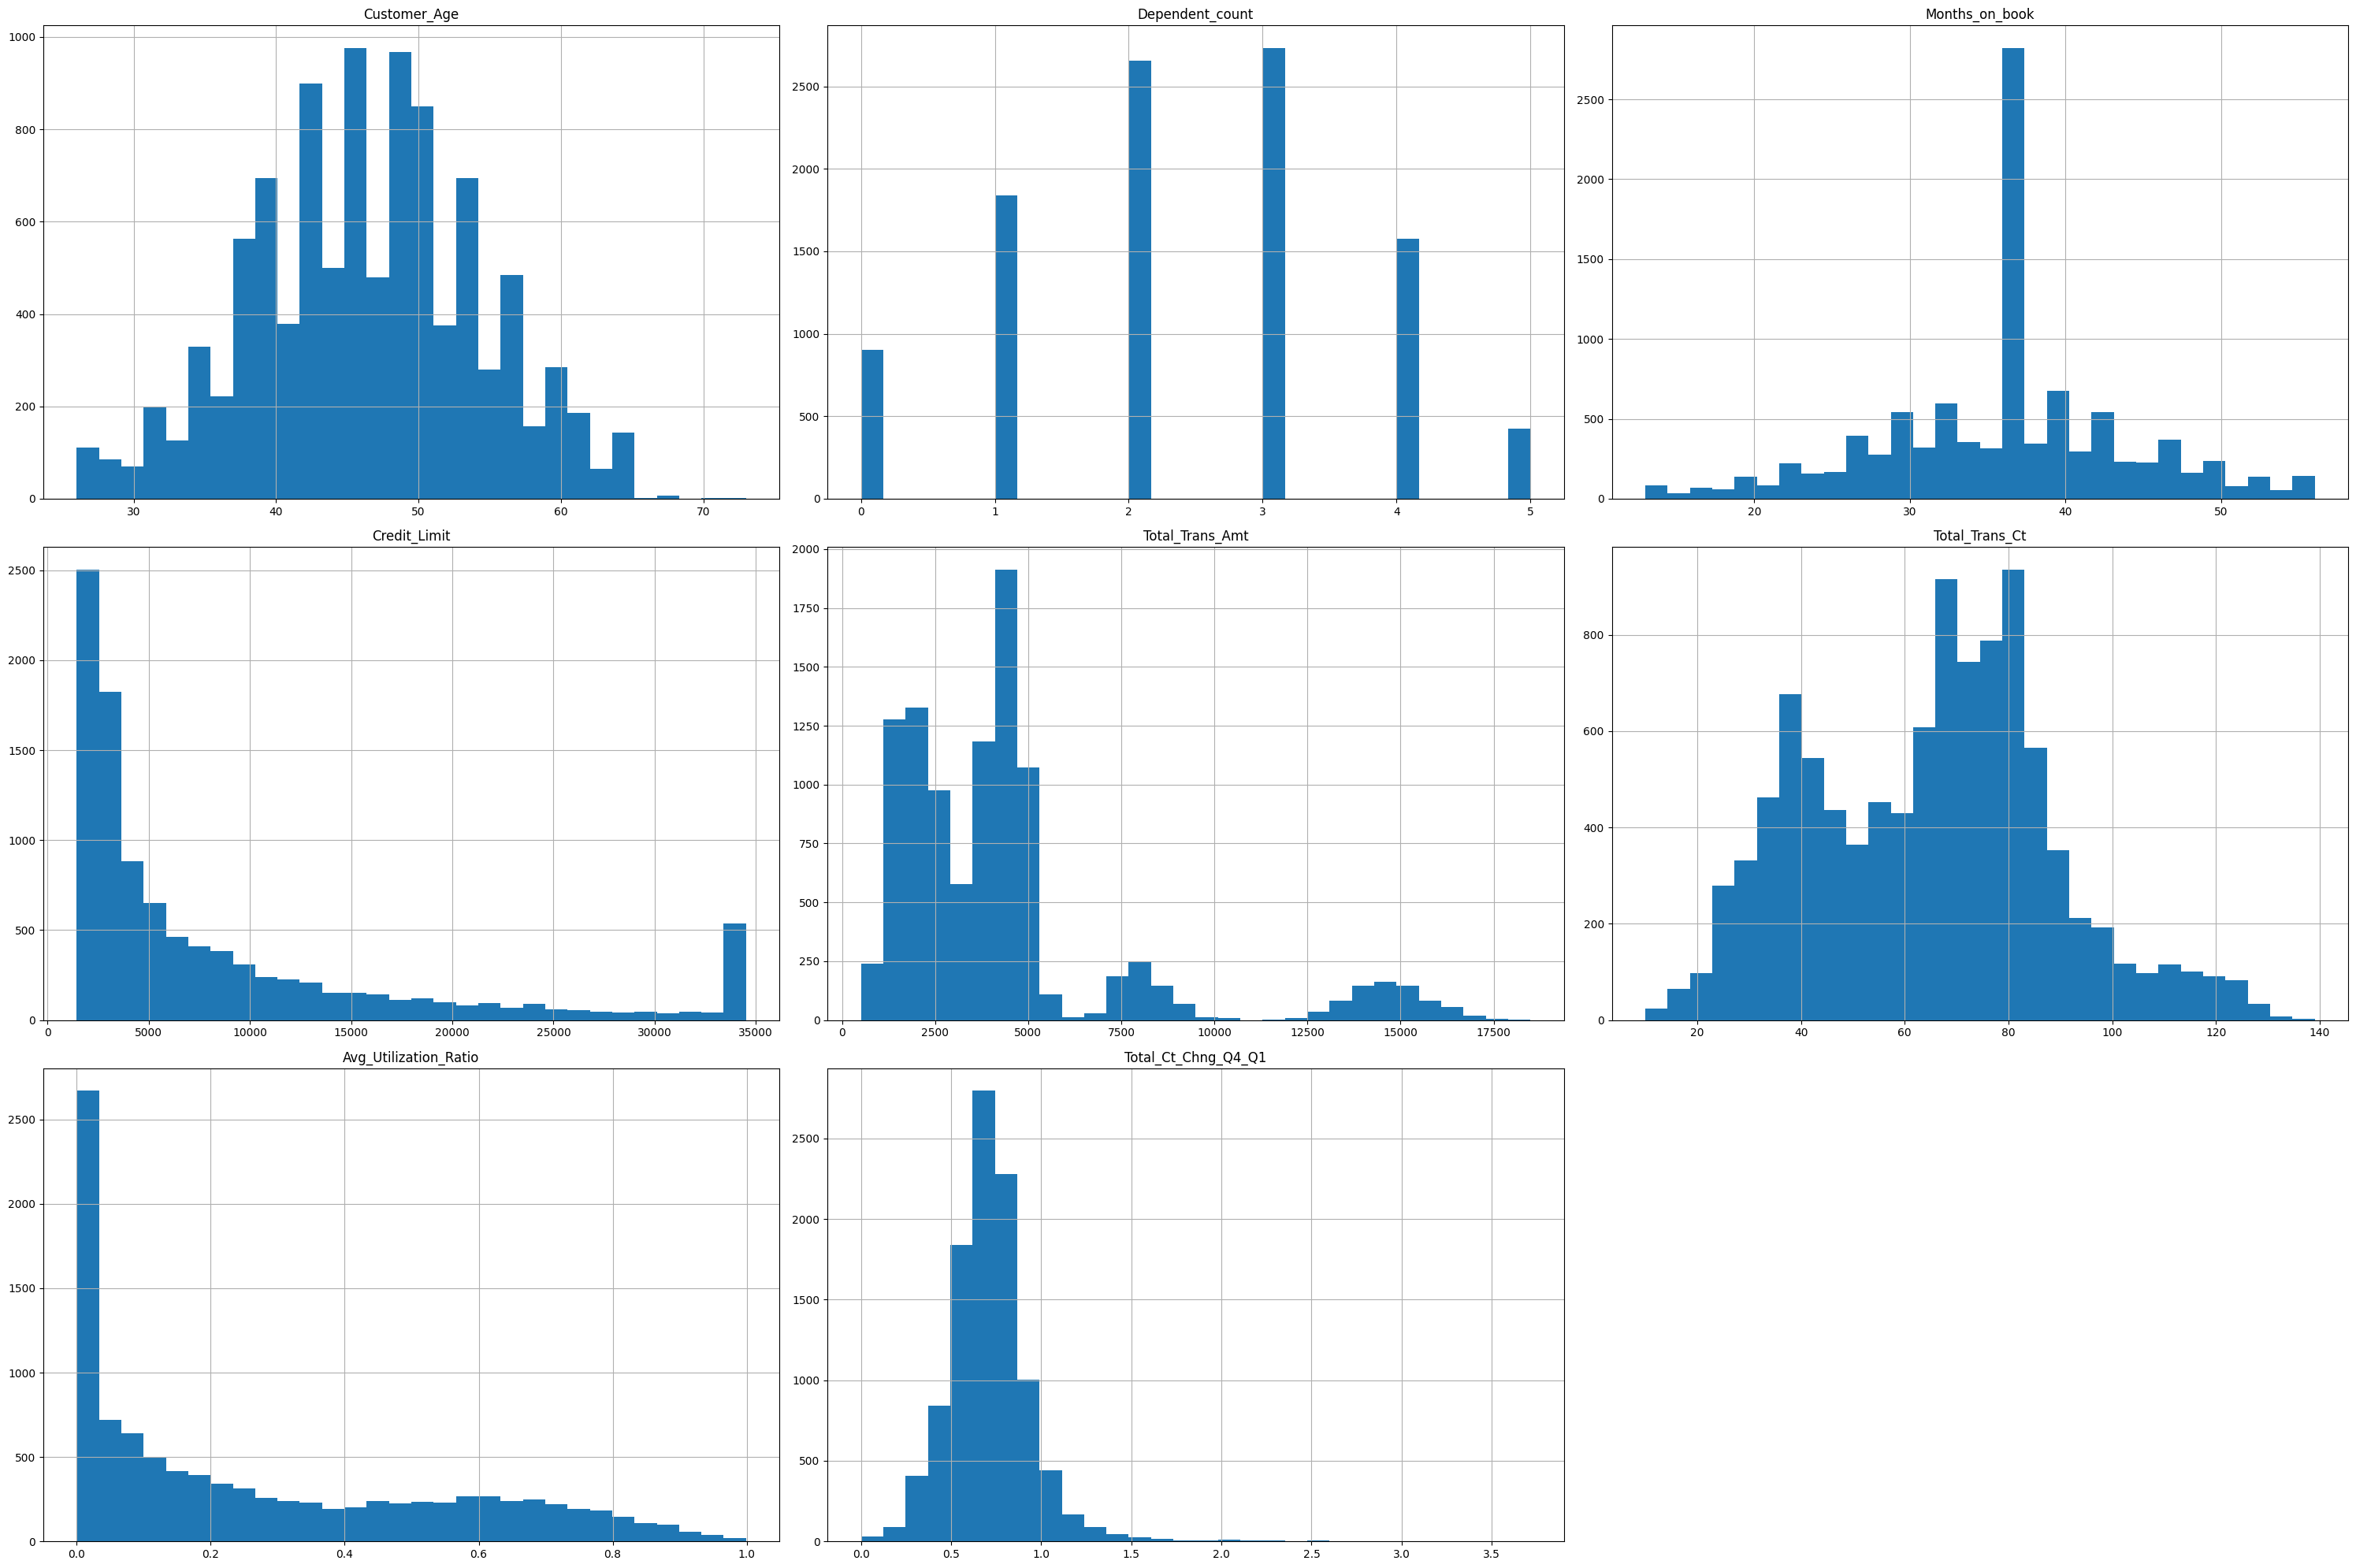

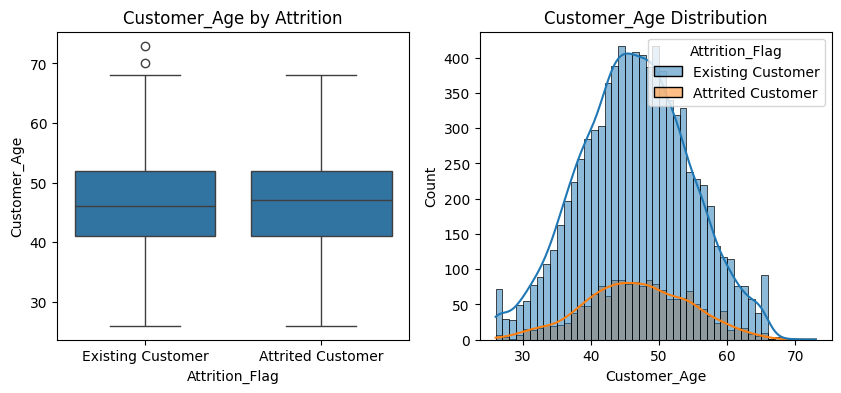

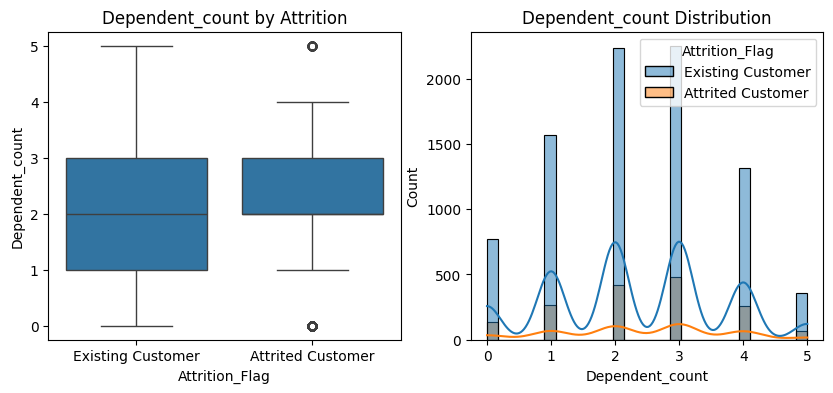

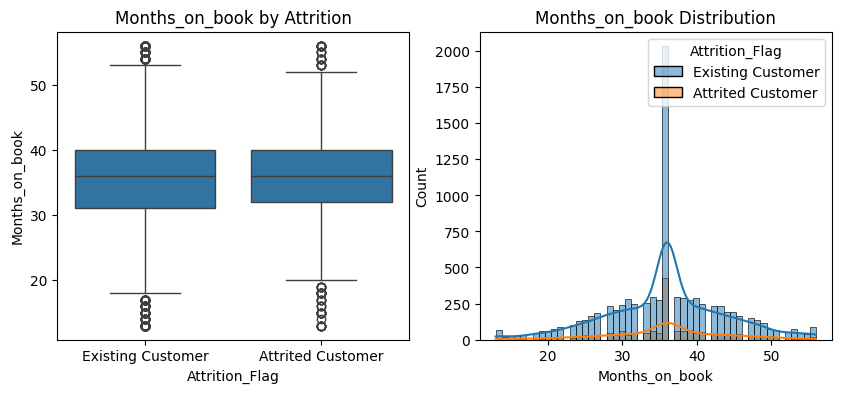

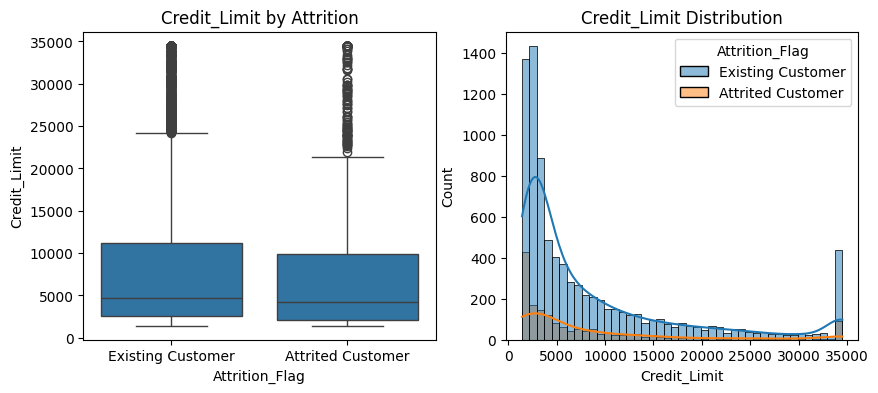

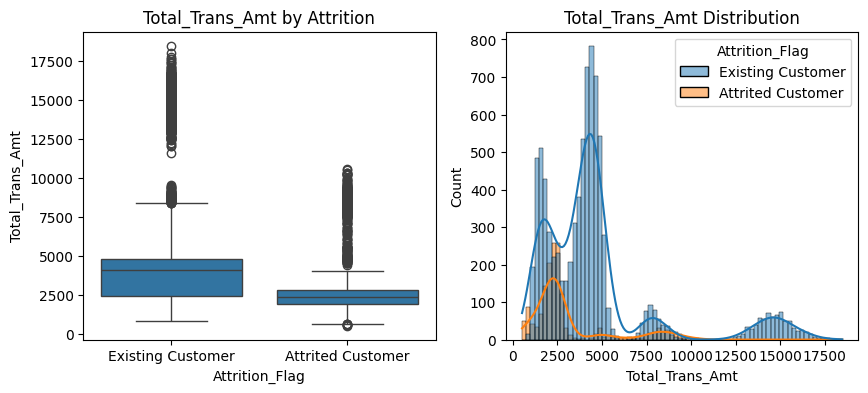

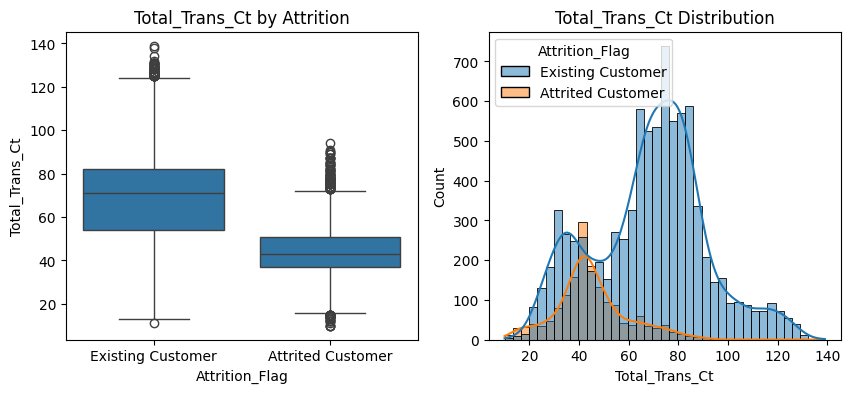

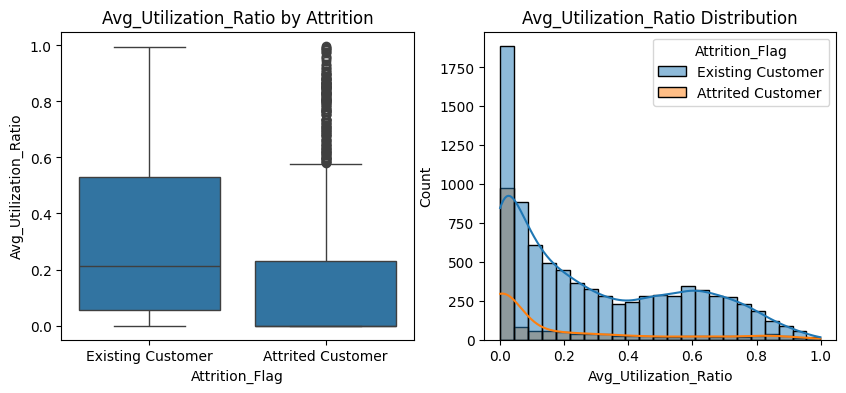

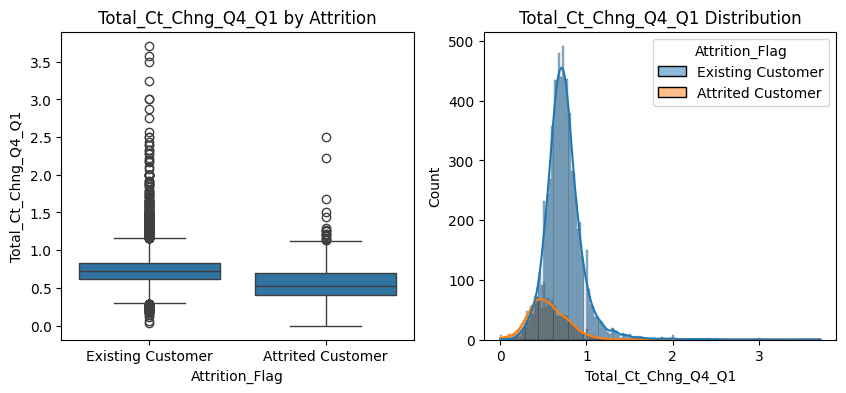

In [10]:
# 수치형 변수 리스트
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                  'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 
                  'Avg_Utilization_Ratio', 'Total_Ct_Chng_Q4_Q1']

# 분포 확인
df[numerical_cols].hist(figsize=(30, 20), bins=30)
plt.tight_layout() # 서브플롯들이 그림 영역에 맞게 조정됩니다.
plt.show() # 히스토그램 출력

# 이탈 여부에 따른 차이 확인
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    
    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='Attrition_Flag', y=col)
    plt.title(f'{col} by Attrition')
    
    # Distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=col, hue='Attrition_Flag', kde=True)
    plt.title(f'{col} Distribution')
    
    # plt.tight_layout()
    # plt.show()

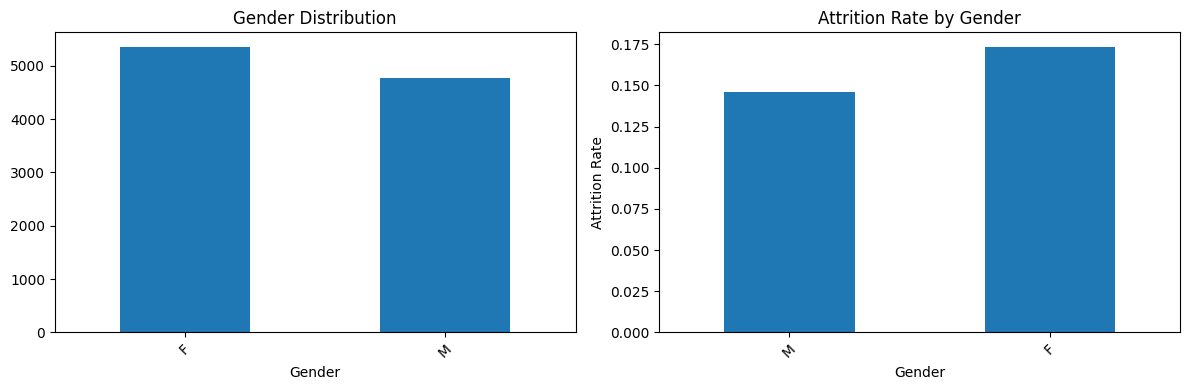

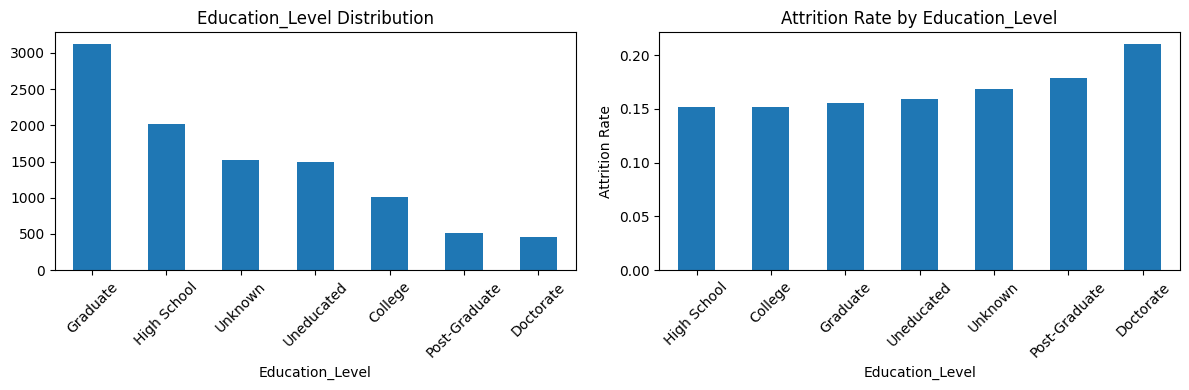

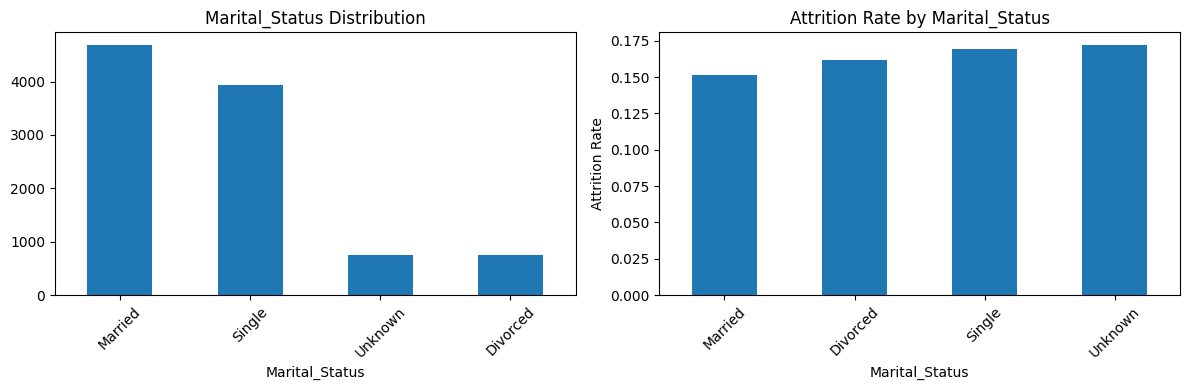

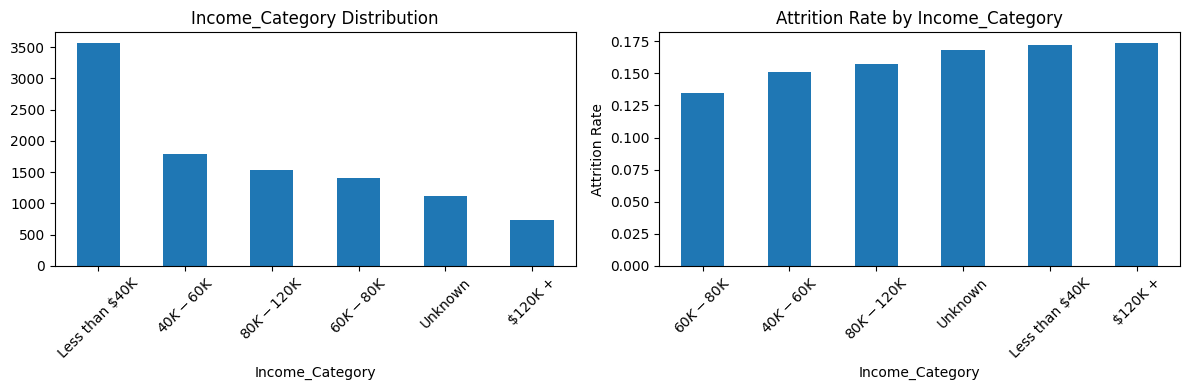

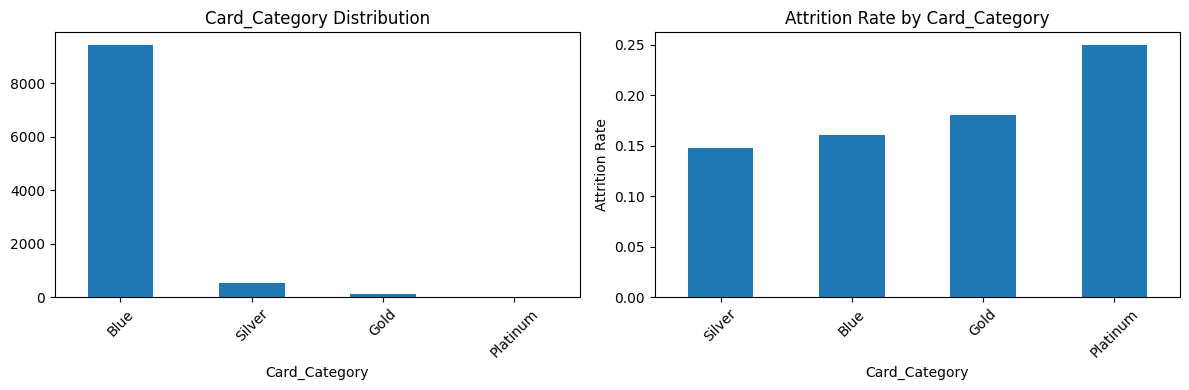

In [12]:
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 
                    'Income_Category', 'Card_Category']

for col in categorical_cols:
    plt.figure(figsize=(12, 4))
    
    # 전체 분포
    plt.subplot(1, 2, 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    
    # 이탈률 비교
    plt.subplot(1, 2, 2)
    attrition_rate = df.groupby(col)['Attrition_Flag'].apply(
        lambda x: (x == 'Attrited Customer').mean()
    ).sort_values()
    attrition_rate.plot(kind='bar')
    plt.title(f'Attrition Rate by {col}')
    plt.ylabel('Attrition Rate')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

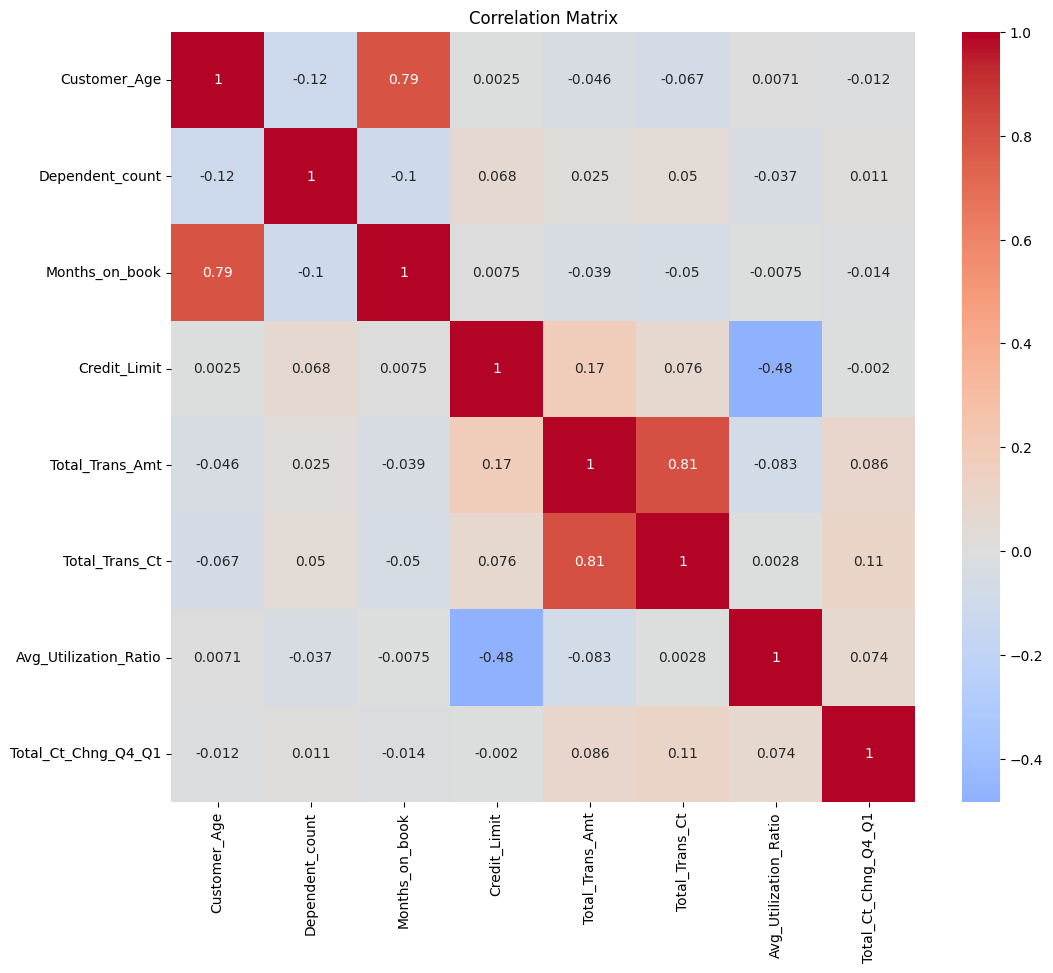

Attrition_Binary         1.000000
Dependent_count          0.018991
Customer_Age             0.018203
Months_on_book           0.013687
Credit_Limit            -0.023873
Total_Trans_Amt         -0.168598
Avg_Utilization_Ratio   -0.178410
Total_Ct_Chng_Q4_Q1     -0.290054
Total_Trans_Ct          -0.371403
Name: Attrition_Binary, dtype: float64


In [13]:
# 수치형 변수들 간의 상관관계
plt.figure(figsize=(12, 10))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Target과의 상관관계 (숫자로 인코딩 필요)
df['Attrition_Binary'] = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
correlations_with_target = df[numerical_cols + ['Attrition_Binary']].corr()['Attrition_Binary'].sort_values(ascending=False)
print(correlations_with_target)